In [1]:
import itertools
import numpy as np
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
from time import time
from collections import OrderedDict
from sklearn.preprocessing import StandardScaler
import networkx as nx
from matplotlib.lines import Line2D
from datetime import datetime

In [7]:
df=pd.read_csv('charliehebdo.csv', encoding='ANSI')
df1=pd.read_csv('fergusonre.csv', encoding='ANSI')
df2=pd.read_csv('germanwings-crash.csv', encoding='ANSI')
df3=pd.read_csv('ottawashooting.csv', encoding='ANSI')
df4=pd.read_csv('sydneysiege.csv', encoding='ANSI')

LookupError: unknown encoding: ansi

In [4]:
df

,is_rumor,is_source_tweet,text
0,False,False,ATEEKSTER foxllwynog But who dare criticise a ...
1,False,False,foxllwynog ATEEKSTER tommallow Easy to do to t...
2,False,False,KazWokingham tommallow foxllwynog I'm moderate...
3,False,False,KazWokingham ATEEKSTER tommallow We follow dif...
4,False,False,KazWokingham ATEEKSTER foxllwynog Bullying He...
5,False,False,foxllwynog ATEEKSTER tommallow When the main s...
6,False,False,tommallow ATEEKSTER I once had a long chat wit...
7,False,False,foxllwynog ATEEKSTER But in public? At the pul...
8,False,False,tommallow ATEEKSTER foxllwynog There is no dea...
9,False,False,ATEEKSTER KazWokingham foxllwynog You don't know?


In [5]:
tweets=pd.concat([df, df1, df2, df3, df4])
tweets

,is_rumor,is_source_tweet,text
0,False,False,ATEEKSTER foxllwynog But who dare criticise a ...
1,False,False,foxllwynog ATEEKSTER tommallow Easy to do to t...
2,False,False,KazWokingham tommallow foxllwynog I'm moderate...
3,False,False,KazWokingham ATEEKSTER tommallow We follow dif...
4,False,False,KazWokingham ATEEKSTER foxllwynog Bullying He...
5,False,False,foxllwynog ATEEKSTER tommallow When the main s...
6,False,False,tommallow ATEEKSTER I once had a long chat wit...
7,False,False,foxllwynog ATEEKSTER But in public? At the pul...
8,False,False,tommallow ATEEKSTER foxllwynog There is no dea...
9,False,False,ATEEKSTER KazWokingham foxllwynog You don't know?


In [6]:
dff=tweets[['is_rumor', 'is_source_tweet', 'text']]

In [7]:
dff.dropna(inplace=True)

In [8]:
def textToNumbericConverter(df):
    columns = df.columns.values

    for col in columns:
        tex_digit_vals = {}
        def convertToInt(val):
            return tex_digit_vals[val]
        if df[col].dtype != np.int64 and df[col].dtype != np.float64:
            column_contents = df[col].values.tolist()
            unique_elements = set(column_contents)
            x=0
            for unique in unique_elements:
                if unique not in tex_digit_vals:
                    tex_digit_vals[unique] = x
                    x +=1
            df[col] = list(map(convertToInt, df[col]))
    return df
df = textToNumbericConverter(dff)

In [9]:
dff['is_rumor']

0       0
1       0
2       0
3       0
4       0
5       0
6       0
7       0
8       0
9       0
10      0
11      0
12      0
13      0
14      0
15      0
16      0
17      0
18      0
19      0
20      0
21      0
22      0
23      0
24      0
25      0
26      0
27      0
28      0
29      0
       ..
8043    1
8044    1
8045    1
8046    1
8047    1
8048    1
8049    1
8050    1
8051    1
8052    1
8053    1
8054    1
8055    1
8056    1
8057    1
8058    1
8059    1
8060    1
8061    1
8062    1
8063    1
8064    1
8065    1
8066    1
8067    1
8068    1
8069    1
8070    1
8071    1
8072    1
Name: is_rumor, Length: 58090, dtype: int64

In [10]:
dff['is_rumor'].to_csv('df.csv')

C:\Users\Sacnet\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: The signature of `Series.to_csv` was aligned to that of `DataFrame.to_csv`, and argument 'header' will change its default value from False to True: please pass an explicit value to suppress this warning.
  """Entry point for launching an IPython kernel.


In [11]:
dfa=pd.read_csv('df.csv', header=None)
dfa

,0,1
0,0,0
1,1,0
2,2,0
3,3,0
4,4,0
5,5,0
6,6,0
7,7,0
8,8,0
9,9,0


In [12]:
del dfa[0]

In [13]:
dfa

,1
0,0
1,0
2,0
3,0
4,0
5,0
6,0
7,0
8,0
9,0


In [14]:
tweets.to_csv('dff.csv')

In [15]:
dft=pd.read_csv('dff.csv')
dft

,Unnamed: 0,is_rumor,is_source_tweet,text
0,0,False,False,ATEEKSTER foxllwynog But who dare criticise a ...
1,1,False,False,foxllwynog ATEEKSTER tommallow Easy to do to t...
2,2,False,False,KazWokingham tommallow foxllwynog I'm moderate...
3,3,False,False,KazWokingham ATEEKSTER tommallow We follow dif...
4,4,False,False,KazWokingham ATEEKSTER foxllwynog Bullying He...
5,5,False,False,foxllwynog ATEEKSTER tommallow When the main s...
6,6,False,False,tommallow ATEEKSTER I once had a long chat wit...
7,7,False,False,foxllwynog ATEEKSTER But in public? At the pul...
8,8,False,False,tommallow ATEEKSTER foxllwynog There is no dea...
9,9,False,False,ATEEKSTER KazWokingham foxllwynog You don't know?


In [16]:
del dft['Unnamed: 0']
dft

,is_rumor,is_source_tweet,text
0,False,False,ATEEKSTER foxllwynog But who dare criticise a ...
1,False,False,foxllwynog ATEEKSTER tommallow Easy to do to t...
2,False,False,KazWokingham tommallow foxllwynog I'm moderate...
3,False,False,KazWokingham ATEEKSTER tommallow We follow dif...
4,False,False,KazWokingham ATEEKSTER foxllwynog Bullying He...
5,False,False,foxllwynog ATEEKSTER tommallow When the main s...
6,False,False,tommallow ATEEKSTER I once had a long chat wit...
7,False,False,foxllwynog ATEEKSTER But in public? At the pul...
8,False,False,tommallow ATEEKSTER foxllwynog There is no dea...
9,False,False,ATEEKSTER KazWokingham foxllwynog You don't know?


In [17]:
dft['is_rumor'].value_counts().reset_index()

,index,is_rumor
0,False,38011
1,True,20080


In [18]:
X=dft.text
X

0        ATEEKSTER foxllwynog But who dare criticise a ...
1        foxllwynog ATEEKSTER tommallow Easy to do to t...
2        KazWokingham tommallow foxllwynog I'm moderate...
3        KazWokingham ATEEKSTER tommallow We follow dif...
4        KazWokingham ATEEKSTER foxllwynog  Bullying He...
5        foxllwynog ATEEKSTER tommallow When the main s...
6        tommallow ATEEKSTER I once had a long chat wit...
7        foxllwynog ATEEKSTER But in public? At the pul...
8        tommallow ATEEKSTER foxllwynog There is no dea...
9        ATEEKSTER KazWokingham foxllwynog You don't know?
10       tommallow ATEEKSTER foxllwynog this is not jus...
11             tommallow ATEEKSTER Both  a man I respected
12       tommallow ATEEKSTER KazWokingham The perceptio...
13       tommallow ATEEKSTER foxllwynog Laughing at inc...
14       foxllwynog tommallow ATEEKSTER Im a devout hum...
15       KazWokingham ATEEKSTER foxllwynog No. You and ...
16       KazWokingham ATEEKSTER foxllwynog Or getting sh

In [19]:
import re
output = re.sub(r'\d+', '', 'X')

In [20]:
dft.dropna(inplace=True)

In [21]:
X.dropna(inplace=True)

In [22]:
import re, string, unicodedata
import nltk
from bs4 import BeautifulSoup
from nltk import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import LancasterStemmer, WordNetLemmatizer

In [23]:
def clean_html(sentence):
    cleanr = re.compile('<.*?>')
    cleantext = re.sub(cleanr, ' ', sentence)
    return cleantext

In [24]:
def clean_punc(word):
    cleaned = re.sub(r'[?|!|\'|#]', r'', word)
    cleaned = re.sub(r'[.|,|)|(|\|/]', r' ', cleaned)
    clean = re.sub(r'1,2,3,4,5,6,7,8,9,0', r' ', cleaned)
    return clean

In [25]:
import nltk
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
import re
from nltk.corpus import stopwords as stp
from textblob import TextBlob
nltk.download('stopwords')
sno = nltk.stem.PorterStemmer()

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Sacnet\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Sacnet\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Sacnet\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [26]:
stop = stp.words('english')
final_string = []
s = ''
for sentence in X.values:
    filtered_sentence = []
    sentence = clean_html(sentence)
    for word in sentence.split():
        for cleaned_word in clean_punc(word).split():
            if (cleaned_word.isalpha() and (len(cleaned_word) > 2) and cleaned_word not in stop):
                s = (sno.stem(cleaned_word.lower())).encode('utf8')
                filtered_sentence.append(s)
            else:
                continue
                 
    strl = b' '.join(filtered_sentence)
    final_string.append(strl)

In [27]:
asdg=pd.DataFrame(final_string)
asdg

,0
0,b'ateekst foxllwynog but dare criticis man gun...
1,b'foxllwynog ateekst tommallow easi live hell ...
2,b'kazwokingham tommallow foxllwynog moder think'
3,b'kazwokingham ateekst tommallow follow differ...
4,b'kazwokingham ateekst foxllwynog bulli he dea...
5,b'foxllwynog ateekst tommallow when main sourc...
6,b'tommallow ateekst long chat irish cathol pri...
7,b'foxllwynog ateekst but public pulpit'
8,b'tommallow ateekst foxllwynog there death pro...
9,b'ateekst kazwokingham foxllwynog you dont know'


In [28]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM, CuDNNLSTM, Embedding, Activation, GRU, Flatten
from tensorflow.keras import layers, metrics
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.preprocessing.sequence import pad_sequences
import tensorflow as tf

In [29]:
from tensorflow.keras.preprocessing.text import Tokenizer
num_words = 10000
tokenizer = Tokenizer(num_words=num_words)

In [30]:
dat=tokenizer.fit_on_texts(X)

In [31]:
tokenizer.word_index

{'the': 1,
 'to': 2,
 'a': 3,
 't': 4,
 'co': 5,
 'of': 6,
 'in': 7,
 'http': 8,
 'is': 9,
 'and': 10,
 'you': 11,
 'i': 12,
 'that': 13,
 'it': 14,
 'are': 15,
 'not': 16,
 'this': 17,
 'for': 18,
 'they': 19,
 'on': 20,
 'be': 21,
 'have': 22,
 'police': 23,
 'ferguson': 24,
 'at': 25,
 'was': 26,
 'with': 27,
 'all': 28,
 'what': 29,
 'but': 30,
 'no': 31,
 'we': 32,
 'people': 33,
 'so': 34,
 'as': 35,
 'if': 36,
 'just': 37,
 'your': 38,
 'he': 39,
 'do': 40,
 'charliehebdo': 41,
 'by': 42,
 "don't": 43,
 'from': 44,
 'amp': 45,
 "it's": 46,
 'about': 47,
 'like': 48,
 'who': 49,
 'an': 50,
 'or': 51,
 'will': 52,
 'there': 53,
 'them': 54,
 'their': 55,
 'up': 56,
 'one': 57,
 'out': 58,
 'why': 59,
 'now': 60,
 'my': 61,
 'how': 62,
 'has': 63,
 'paris': 64,
 'know': 65,
 'more': 66,
 'can': 67,
 'rt': 68,
 'u': 69,
 'me': 70,
 'right': 71,
 'get': 72,
 'been': 73,
 'his': 74,
 'would': 75,
 'breaking': 76,
 'when': 77,
 'muslims': 78,
 'should': 79,
 "i'm": 80,
 'us': 81,
 'isl

In [32]:
from sklearn.model_selection import train_test_split
X_train, test, y_train, y_test=train_test_split(X, dfa, test_size=0.20, random_state=42)

In [33]:
XX_train, ttest, yy_train, yy_test=train_test_split(X_train, y_train, test_size=0.20, random_state=42)

In [34]:
data=tokenizer.texts_to_matrix(XX_train, mode='tfidf')

In [35]:
data1=tokenizer.texts_to_matrix(test, mode='tfidf')

In [36]:
data2=tokenizer.texts_to_matrix(ttest, mode='tfidf')

In [37]:
data=pd.DataFrame(data)
data1=pd.DataFrame(data1)
data2=pd.DataFrame(data2)

In [38]:
#from sklearn.model_selection import train_test_split
#X_train, test, y_train, y_test=train_test_split(asd, dfa, test_size=0.20, random_state=42)

In [39]:
#X_train

In [40]:
#XX_train, ttest, yy_train, yy_test=train_test_split(X_train, y_train, test_size=0.20, random_state=42)

In [41]:
from sklearn import preprocessing
minmax = preprocessing.MinMaxScaler(feature_range=(0,1))
X_trainns=minmax.fit(data)
X_trainns=minmax.transform(data)
testts=minmax.fit(data1)
testts=minmax.transform(data1)
ttessts=minmax.fit(data2)
ttessts=minmax.transform(data2)

In [42]:
dataa=pd.DataFrame(X_trainns)
data1a=pd.DataFrame(testts)
data2a=pd.DataFrame(ttessts)

In [43]:
dataa

,0,1,2,3,4,5,6,7,8,9,...,9990,9991,9992,9993,9994,9995,9996,9997,9998,9999
0,0.0,0.383224,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.000000,0.606480,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.41906,0.00000,0.000000,0.358197,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.000000,0.000000,0.383224,0.000000,0.000000,0.41906,0.00000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.383224,0.383224,0.383224,0.383224,0.383224,0.00000,0.00000,0.383224,0.358197,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.0,0.000000,0.000000,0.383224,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [44]:
yy_train

,1
13415,0
48640,1
27811,0
34268,0
56694,1
26259,0
44626,1
10303,0
53337,0
19519,1


In [45]:
#traintoken=tokenizer.texts_to_sequences(dataa)

In [47]:
#testtoken=tokenizer.texts_to_sequences(testts)

In [36]:
#straintoken=tokenizer.texts_to_sequences(ttessts)

In [38]:
#stesttoken=tokenizer.texts_to_sequences()

In [48]:
tokenizer.word_index

{'the': 1,
 'to': 2,
 'a': 3,
 't': 4,
 'co': 5,
 'of': 6,
 'in': 7,
 'http': 8,
 'is': 9,
 'and': 10,
 'you': 11,
 'i': 12,
 'that': 13,
 'it': 14,
 'are': 15,
 'not': 16,
 'this': 17,
 'for': 18,
 'they': 19,
 'on': 20,
 'be': 21,
 'have': 22,
 'police': 23,
 'ferguson': 24,
 'at': 25,
 'was': 26,
 'with': 27,
 'all': 28,
 'what': 29,
 'but': 30,
 'no': 31,
 'we': 32,
 'people': 33,
 'so': 34,
 'as': 35,
 'if': 36,
 'just': 37,
 'your': 38,
 'he': 39,
 'do': 40,
 'charliehebdo': 41,
 'by': 42,
 "don't": 43,
 'from': 44,
 'amp': 45,
 "it's": 46,
 'about': 47,
 'like': 48,
 'who': 49,
 'an': 50,
 'or': 51,
 'will': 52,
 'there': 53,
 'them': 54,
 'their': 55,
 'up': 56,
 'one': 57,
 'out': 58,
 'why': 59,
 'now': 60,
 'my': 61,
 'how': 62,
 'has': 63,
 'paris': 64,
 'know': 65,
 'more': 66,
 'can': 67,
 'rt': 68,
 'u': 69,
 'me': 70,
 'right': 71,
 'get': 72,
 'been': 73,
 'his': 74,
 'would': 75,
 'breaking': 76,
 'when': 77,
 'muslims': 78,
 'should': 79,
 "i'm": 80,
 'us': 81,
 'isl

In [49]:
#num_tokens=[len(tokens) for tokens in dataa + data1a + data2a]
#num_tokens=np.array(num_tokens)

In [25]:
np.mean(num_tokens)

13.539762818276945

In [26]:
np.max(num_tokens)

39

In [48]:
max_tokens=np.mean(num_tokens) + 2 * np.std(num_tokens)
max_tokens = int(max_tokens)
max_tokens

NameError: name 'num_tokens' is not defined

In [28]:
np.sum(num_tokens<max_tokens)/len(num_tokens)

0.989671743595706

In [29]:
pad='pre'

In [47]:
x_test_pad = pad_sequences(test, maxlen=max_tokens, padding=pad, truncating=pad)
x_train_pad = pad_sequences(XX_train, maxlen=max_tokens, padding=pad, truncating=pad)
x_testt_pad = pad_sequences(ttest, maxlen=max_tokens, padding=pad, truncating=pad)

NameError: name 'max_tokens' is not defined

In [50]:
idx = tokenizer.word_index
inverse_map = dict(zip(idx.values(), idx.keys()))

In [32]:
def tokens_to_string(tokens):
    words =[inverse_map[token] for token in tokens if token !=0]
    text = " ".join(words)
    return text

In [51]:
embedding_size=8

In [52]:
model = Sequential()
model.add(Embedding(input_dim=num_words, output_dim=embedding_size, name='layer_embedding'))
model.add(LSTM(128, activation="relu", return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(128))
model.add(Dropout(0.2))
model.add(Dense(32, activation='softmax'))
model.add(Dropout(0.2))
opt = tf.keras.optimizers.Adam(lr=1e-3)
model.compile(loss='sparse_categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [54]:
model = Sequential()
model.add(Dense(512))

model.add(Activation('relu'))
model.add(Dropout(0.5))

model.add(Activation('softmax'))
opt = tf.keras.optimizers.Adam(lr=1e-3)
model.compile(loss='sparse_categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

In [1]:
model.fit(dataa, yy_train, validation_split=0.05, batch_size=64, epochs=3, verbose=1)

NameError: name 'model' is not defined

In [37]:
score=model.predict(x_test_pad)
score

array([[1.000000e+00, 0.000000e+00, 0.000000e+00, ..., 0.000000e+00,
        0.000000e+00, 0.000000e+00],
       [1.000000e+00, 5.044305e-29, 0.000000e+00, ..., 0.000000e+00,
        0.000000e+00, 0.000000e+00],
       [1.000000e+00, 0.000000e+00, 0.000000e+00, ..., 0.000000e+00,
        0.000000e+00, 0.000000e+00],
       ...,
       [1.000000e+00, 0.000000e+00, 0.000000e+00, ..., 0.000000e+00,
        0.000000e+00, 0.000000e+00],
       [1.000000e+00, 0.000000e+00, 0.000000e+00, ..., 0.000000e+00,
        0.000000e+00, 0.000000e+00],
       [1.000000e+00, 0.000000e+00, 0.000000e+00, ..., 0.000000e+00,
        0.000000e+00, 0.000000e+00]], dtype=float32)

In [43]:
model = Sequential()
model.add(Embedding(input_dim=num_words, output_dim=embedding_size, input_length=max_tokens, name='layer_embedding'))
model.add(GRU(units=16, return_sequences=True))
model.add(GRU(units=8, return_sequences=True))
model.add(GRU(units=4))
model.add(Dense(1, activation='sigmoid'))
opt = tf.keras.optimizers.Adam(lr=1e-3)
model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])

In [44]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
layer_embedding (Embedding)  (None, 26, 8)             80000     
_________________________________________________________________
gru_12 (GRU)                 (None, 26, 16)            1200      
_________________________________________________________________
gru_13 (GRU)                 (None, 26, 8)             600       
_________________________________________________________________
gru_14 (GRU)                 (None, 4)                 156       
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 5         
Total params: 81,961
Trainable params: 81,961
Non-trainable params: 0
_________________________________________________________________


In [45]:
hist=model.fit(x_train_pad, yy_train, validation_split=0.05, batch_size=64, epochs=3)

Train on 62752 samples, validate on 3303 samples
Instructions for updating:
Use tf.cast instead.
Epoch 1/3
62752/62752 [==============================] - 72s 1ms/sample - loss: 0.4475 - acc: 0.7941 - val_loss: 0.3399 - val_acc: 0.8565
Epoch 2/3
62752/62752 [==============================] - 65s 1ms/sample - loss: 0.3039 - acc: 0.8714 - val_loss: 0.3162 - val_acc: 0.8668
Epoch 3/3
62752/62752 [==============================] - 64s 1ms/sample - loss: 0.2639 - acc: 0.8868 - val_loss: 0.3042 - val_acc: 0.8647


In [46]:
pred2=model.predict(x_testt_pad)

In [47]:
score=model.evaluate(x_testt_pad, yy_test)
score[1]

16514/16514 [==============================] - 5s 322us/sample - loss: 0.3070 - acc: 0.8638


0.8638125

In [48]:
from sklearn.ensemble import RandomForestClassifier

from sklearn import svm
from sklearn.svm import LinearSVC

svmlinear=LinearSVC()


clf = svm.SVC(kernel='rbf',gamma='scale')
cf=clf

In [49]:
cl=cf.fit(x_train_pad, yy_train)

C:\Users\Sacnet\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [50]:
pred1=cf.predict(x_testt_pad)

In [104]:
from sklearn.metrics import accuracy_score, auc,confusion_matrix,precision_recall_curve,precision_score,roc_auc_score,roc_curve,recall_score, adjusted_rand_score,classification_report, f1_score, average_precision_score

In [52]:
print(accuracy_score(pred1, yy_test)*100)

69.23822211456945


In [53]:
parameters={'C':(0.1,1,10,100)}
from sklearn.model_selection import GridSearchCV
grid_search=GridSearchCV(svmlinear, parameters, n_jobs=-1, cv=3)

In [233]:
grid_search.fit(x_train_pad, yy_train)

C:\Users\Sacnet\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Sacnet\Anaconda3\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


GridSearchCV(cv=3, error_score='raise-deprecating',
       estimator=LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'C': (0.1, 1, 10, 100)}, pre_dispatch='2*n_jobs',
       refit=True, return_train_score='warn', scoring=None, verbose=0)

In [52]:
grid_search.best_score_

0.5691469230186965

In [53]:
svc_best=grid_search.best_estimator_

In [54]:
accuracy=svc_best.score(x_testt_pad, yy_test)

In [55]:
accuracy*100

51.2958701707642

In [54]:
rf=RandomForestClassifier(n_estimators=100, max_depth=400, random_state=5)

In [55]:
cr=rf.fit(x_train_pad, yy_train)

C:\Users\Sacnet\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


In [56]:
pred3=rf.predict(x_testt_pad)

In [57]:
print(accuracy_score(pred3, yy_test)*100)

71.98134915828993


In [73]:
stacked_prediction = np.column_stack((pred1, pred2, pred3))

In [74]:
metal_model = Sequential()
metal_model.add(Embedding(input_dim=num_words, output_dim=embedding_size, input_length=max_tokens, name='layer_embedding'))
metal_model.add(GRU(units=16, return_sequences=True))
metal_model.add(GRU(units=8, return_sequences=True))
metal_model.add(GRU(units=4))
metal_model.add(Dense(1, activation='sigmoid'))
opt = tf.keras.optimizers.Adam(lr=1e-3)
metal_model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])

In [75]:
meta_model=RandomForestClassifier(n_estimators=100, max_depth=160, n_jobs=-1)
meta_model.fit(stacked_prediction, yy_test)

C:\Users\Sacnet\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=160, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [76]:
pred1test=rf.predict(x_test_pad)
pred2test=model.predict(x_test_pad)
pred3test=cf.predict(x_test_pad)

In [77]:
stacked_test_prediction = np.column_stack((pred1test, pred2test, pred3test))

In [78]:
from pickle import dump, load
dump(meta_model, open('meta_model.sav', 'wb'))    

In [79]:
models = load(open('meta_model.sav', 'rb'))

In [80]:
mdel=models.predict(stacked_test_prediction)

In [81]:
acc=accuracy_score(mdel, y_test)
print(acc*100)

81.068643123577


In [82]:
print(classification_report(mdel, y_test))

              precision    recall  f1-score   support

           0       0.86      0.87      0.86     14179
           1       0.71      0.68      0.69      6464

   micro avg       0.81      0.81      0.81     20643
   macro avg       0.78      0.77      0.78     20643
weighted avg       0.81      0.81      0.81     20643



In [83]:
matrix=confusion_matrix(mdel, y_test)
print(matrix)

[[12350  1829]
 [ 2079  4385]]


In [84]:
probs = models.predict_proba(stacked_test_prediction)

In [85]:
probs = probs[:, 1]

In [86]:
auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)

AUC: 0.880


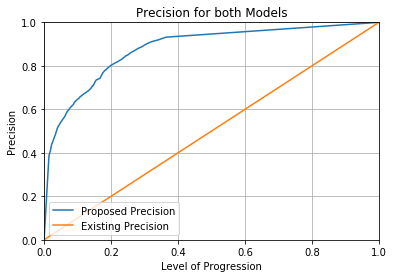

In [191]:
fpr, tpr, thresholds=roc_curve(y_test, probs)
fpr1, tpr1, thresholds=roc_curve(y_test, scores)
plt.plot(fpr, tpr, label='Proposed Precision')
plt.plot(fpr1, tpr1, label='Existing Precision')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title("Precision for both Models")
plt.legend(loc="lower left")
plt.ylabel('Precision')
plt.xlabel('Level of Progression')
plt.grid(True)


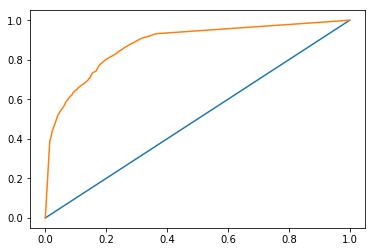

In [196]:
from matplotlib import pyplot
pyplot.plot([0, 1], [0, 1], linestyle='-')
# plot the roc curve for the model
pyplot.plot(fpr, tpr)
# show the plot
pyplot.show()

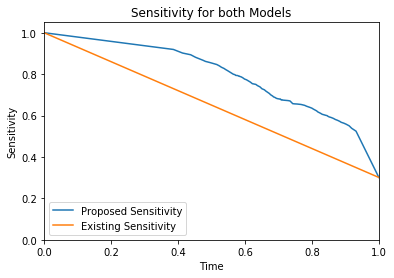

In [198]:
precision, recall, thresholds = precision_recall_curve(y_test, scores)
precision1, recall1, thresholds = precision_recall_curve(y_test, probs)
#area = auc(recall, precision)
plt.plot(recall1, precision1, label='Proposed Sensitivity')
plt.plot(recall, precision, label='Existing Sensitivity')
plt.xlabel('Time')
plt.title("Sensitivity for both Models")
plt.ylabel('Sensitivity')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.legend(loc="lower left")
plt.show()

ap=0.772
app=0.301


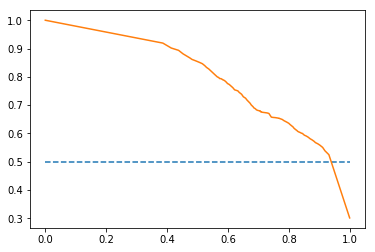

In [189]:
precision, recall, thresholds = precision_recall_curve(y_test, probs)

# calculate F1 score
#f1 = f1_score(y_test, probs)
# calculate precision-recall AUC
#auc = auc(recall, precision)
# calculate average precision score
ap = average_precision_score(y_test, probs)
app = average_precision_score(y_test, scores)
print('ap=%.3f' % (ap))
print('app=%.3f' % (app))
# plot no skill
pyplot.plot([0, 1], [0.5, 0.5], linestyle='--')
# plot the precision-recall curve for the model
pyplot.plot(recall, precision, marker='')
# show the plot
pyplot.show()

In [91]:
train_X = x_train_pad.reshape((x_train_pad.shape[0], 1, x_train_pad.shape[1]))
test_X = x_testt_pad.reshape(( x_testt_pad.shape[0], 1,  x_testt_pad.shape[1]))
testX = x_test_pad.reshape((x_test_pad.shape[0], 1, x_test_pad.shape[1]))
test_X

array([[[   0,    0,    0, ...,    8,   16, 4824]],

       [[   0,    0,    0, ..., 3690,    2,   73]],

       [[   0,    0,    0, ...,    9,    5,    6]],

       ...,

       [[   0,    0,    0, ...,   81,  169,  892]],

       [[   0,    0,    0, ...,  464,  320,  313]],

       [[   0,    0,    0, ...,   26,    1,  229]]])

In [147]:
#from tensorflow.keras import backend as K

In [148]:
def recall_m(y_true, y_pred):
        true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
        possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
        recall = true_positives / (possible_positives + K.epsilon())
        return recall

def precision_m(y_true, y_pred):
        true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
        predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
        precision = true_positives / (predicted_positives + K.epsilon())
        return precision

def f1_m(y_true, y_pred):
    precision = precision_m(y_true, y_pred)
    recall = recall_m(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))

In [179]:
modl = Sequential()
modl.add(Embedding(input_dim=num_words, output_dim=embedding_size, input_length=max_tokens, name='layer_embedding'))
modl.add(LSTM(128, activation="relu", return_sequences=True))
modl.add(Dropout(0.2))
modl.add(LSTM(128))
modl.add(Dropout(0.2))
modl.add(Dense(32, activation='relu'))
modl.add(Dropout(0.2))
opt = tf.keras.optimizers.Adam(lr=1e-3, decay=1e-5)
modl.compile(loss='sparse_categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

In [180]:
history=modl.fit(x_train_pad, yy_train, validation_split=0.05, epochs=3)

Train on 62752 samples, validate on 3303 samples
Epoch 1/3
62752/62752 [==============================] - 317s 5ms/sample - loss: 3.3664 - acc: 0.6786 - val_loss: 3.4657 - val_acc: 0.6936
Epoch 2/3
62752/62752 [==============================] - 297s 5ms/sample - loss: 3.4659 - acc: 0.6953 - val_loss: 3.4657 - val_acc: 0.6936
Epoch 3/3
62752/62752 [==============================] - 301s 5ms/sample - loss: 3.4701 - acc: 0.6949 - val_loss: 3.4657 - val_acc: 0.6936


In [155]:
score=modl.predict(x_test_pad)
score

array([[-0., -0., -0., ..., -0., -0., -0.],
       [-0., -0., -0., ..., -0., -0., -0.],
       [-0., -0., -0., ..., -0., -0., -0.],
       ...,
       [-0., -0., -0., ..., -0., -0., -0.],
       [-0., -0., -0., ..., -0., -0., -0.],
       [-0., -0., -0., ..., -0., -0., -0.]], dtype=float32)

In [156]:
scores=np.argmax(score, axis=1)

In [158]:
print(classification_report(scores, y_test))

              precision    recall  f1-score   support

           0       1.00      0.70      0.82     20643
           1       0.00      0.00      0.00         0

   micro avg       0.70      0.70      0.70     20643
   macro avg       0.50      0.35      0.41     20643
weighted avg       1.00      0.70      0.82     20643



C:\Users\Sacnet\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
C:\Users\Sacnet\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
C:\Users\Sacnet\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


In [160]:
matrix=confusion_matrix(scores, y_test)
matrix

array([[14429,  6214],
       [    0,     0]], dtype=int64)

In [117]:
ypreds = np.argmax(score, axis=1)

In [118]:
precision = average_precision_score(yy_test, ypreds)
print('Precision: %f' % precision)

Precision: 0.307921


In [106]:
sensitivity = recall_score(yy_test, ypreds)
print('Precision: %f' % sensitivity)

Precision: 0.000000


In [405]:
score=modl.evaluate(x_testt_pad, yy_test)
score[1]

16514/16514 [==============================] - 11s 689us/sample - loss: 3.4657 - acc: 0.6921


0.6920794

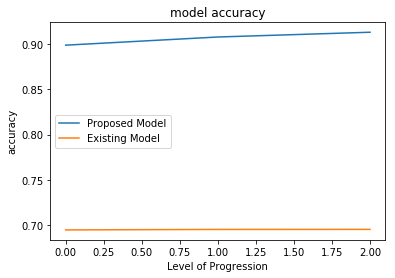

In [442]:
plt.plot(hist.history['acc'])

plt.plot(history.history['acc'])

plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('Level of Progression')
plt.legend(['Proposed Model', 'Existing Model'], loc='center left')
plt.show()

